## Project Supervised Learning
By Ajay Kumar

### Problem Statement

Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


### Data Dictionary

Attribute Information:

•	**ID**	: Customer ID

•	**Age**	: Customer's age in completed years

•	**Experience**	: #years of professional experience

•	**Income**	: Annual income of the customer ($000)

•	**ZIP Code**	: Home Address ZIP code.

•	**Family**	: Family size of the customer

•	**CCAvg**	: Avg. spending on credit cards per month ($000)

•	**Education**	: Education Level.
1.	Undergrad
2.	Graduate
3.	Advanced/Professional

•	**Mortgage**	: Value of house mortgage if any. ($000)
 
•	**Personal Loan**	: Did this customer accept the personal loan offered in
the last campaign?

•	**Securities Account** : Does the customer have a securities account with
the bank?

•	**CD Account**	: Does the customer have a certificate of deposit (CD)
account with the bank?

•	**Online**	: Does the customer use internet banking facilities?

•	**Credit card**	: Does the customer use a credit card issued by
Thera Bank?


## Importing the Libraries

In [191]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [192]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the Dataset

In [193]:
df = pd.read_csv('/content/drive/MyDrive/AIML PROJECT/SUPERVISED MACHINE LEARNING/Bank_Personal_Loan_Modelling.csv')

In [194]:
print(df.shape)
df.head()

(5000, 14)


ID  Age  Experience  ...  CD Account  Online  CreditCard
0   1   25           1  ...           0       0           0
1   2   45          19  ...           0       0           0
2   3   39          15  ...           0       0           0
3   4   35           9  ...           0       0           0
4   5   35           8  ...           0       0           1

[5 rows x 14 columns]

The Dataset has 5000 entries and 14 atributes which includes integer as well as categorical features

## Q1.	Read the column description and ensure you understand each attribute well

In [195]:
# Details of the variables in the Dataset 
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [196]:
# Checking for unwanted Data by value counts and the no. of levels
for feature in df.iloc[:,1:]:
  print(feature, 'Number of levels', df[feature].nunique())
  print(df[feature].value_counts())
  print('\n')

Age Number of levels 45
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64


Experience Number of levels 47
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1     

# Q2.	Study the data distribution in each attribute, share your findings 

#### Exploratory Data Analysis

In [197]:
# Checking the Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


By Analysisng the information of the Dataset we can interpret that Dataset has no null values and the Data types are integer and float. 

#### Statistical Summary

In [198]:
df.iloc[:,1:].describe()

Age   Experience  ...       Online   CreditCard
count  5000.000000  5000.000000  ...  5000.000000  5000.000000
mean     45.338400    20.104600  ...     0.596800     0.294000
std      11.463166    11.467954  ...     0.490589     0.455637
min      23.000000    -3.000000  ...     0.000000     0.000000
25%      35.000000    10.000000  ...     0.000000     0.000000
50%      45.000000    20.000000  ...     1.000000     0.000000
75%      55.000000    30.000000  ...     1.000000     1.000000
max      67.000000    43.000000  ...     1.000000     1.000000

[8 rows x 13 columns]

 By Analysisng the statistical summary I found that there is -ve entry in Experience variable so imputing this with absulute value because it might be a error entry

In [199]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

There are three enty(-1,-2,-3) which are negative so imputing all by absulute value

In [200]:
df['Experience'] = df['Experience'].abs()
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

## Check for Missing and Duplicate values

In [201]:
df.isnull().sum().any()

False

In [202]:
df.duplicated().sum()

0

##### There is no null and duplicate values in the Dataset

## Univariate Analysis

In [203]:
from pylab import rcParams

In [204]:
rcParams['figure.figsize'] = 15,8

In [205]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [206]:
col = [ 'Age', 'Experience', 'Income','Family', 'CCAvg',
       'Education', 'Mortgage']

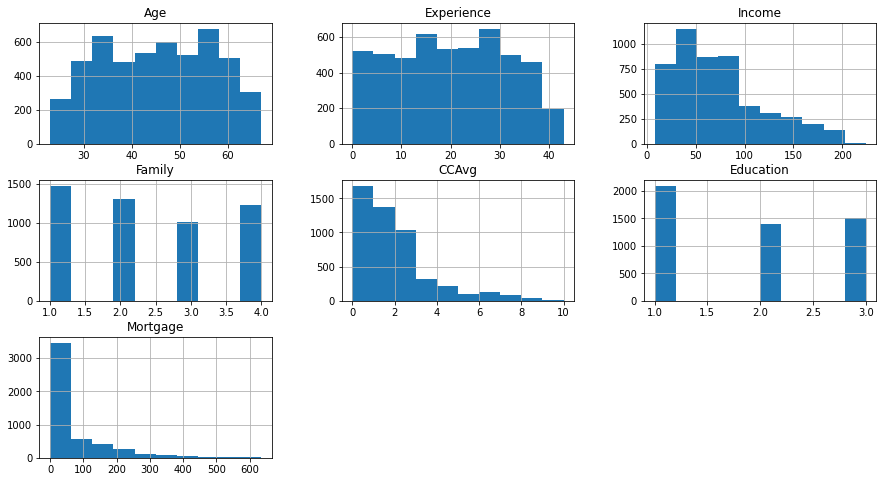

In [207]:
df[col].hist();

Age: By Analysing the histogram we can interpret that varible Age is normally distributed

Experience: varible Experience is slightly right-Skwed 

Income, CCAvg and Mortgage: All are right-Skwed(Positive Skweness) and the highest frequency of income is 50K$ and Mortagage is between 0-50.

Family and Education are categorical variable


## Checking for outliers

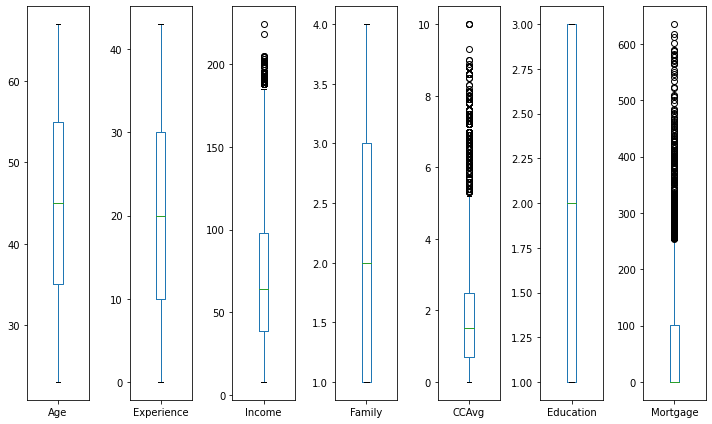

In [208]:
df[col].plot(kind = 'box', subplots = True, figsize= (10,6))
plt.tight_layout();

Variable Income, CCAvg and Mortgage have some upper outliers

### Bi-Variate Analysis with Target variable

##### Age and Personal Loan

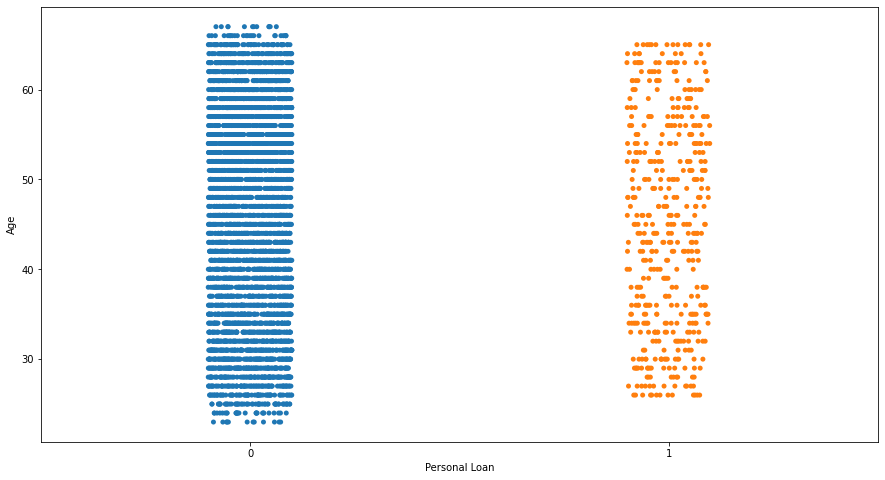

In [209]:
sns.stripplot(data=df, x='Personal Loan', y = 'Age', jitter=True);

Age has normal distribution weather customer will go for Personal Loan or not. The data pionts are not giving much information that customer will for personal loan based on Age.

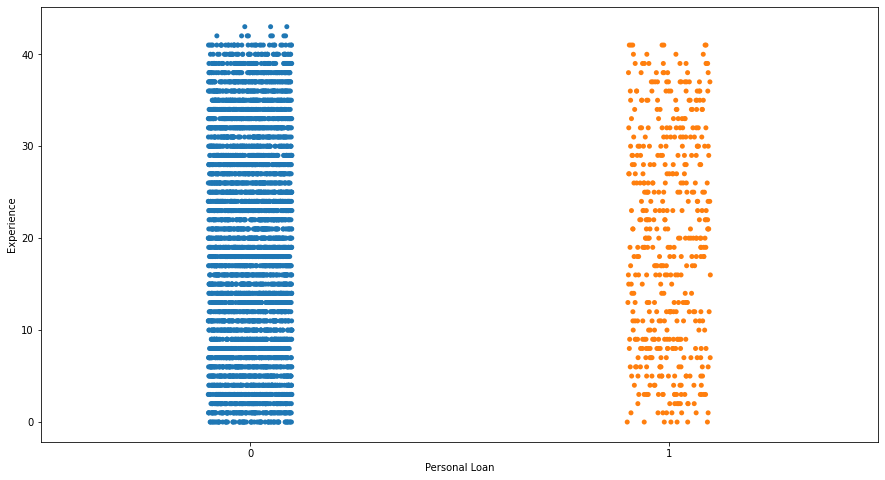

In [210]:
sns.stripplot(data=df, x='Personal Loan', y = 'Experience',jitter=True);

Experience has also normal distribution weather customer will go for Personal Loan or not which same a Age variable

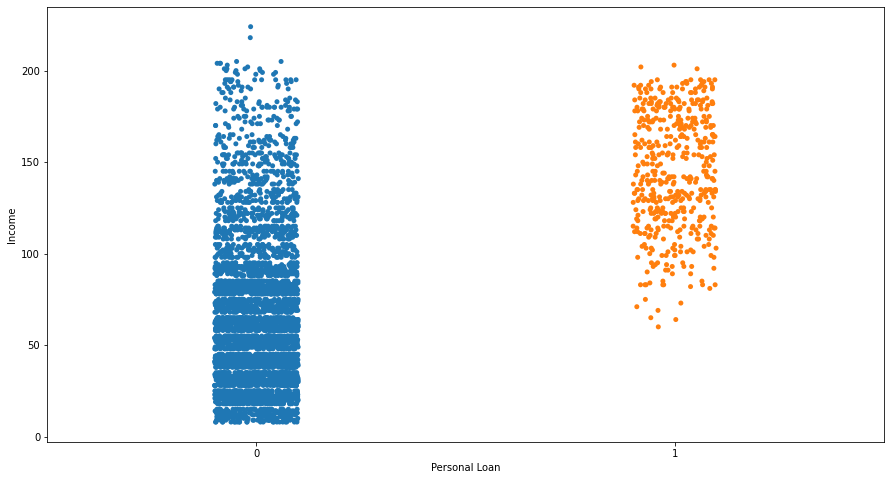

In [211]:
sns.stripplot(data=df, x='Personal Loan', y = 'Income',jitter=True);

The Stripplot of variable Income says higher the income the chances of taking personal loan is more

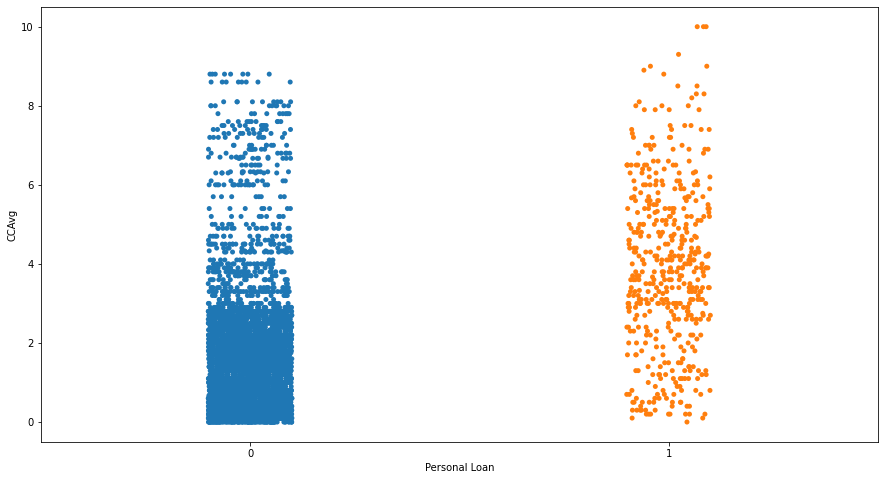

In [212]:
sns.stripplot(data=df, x='Personal Loan', y = 'CCAvg' ,jitter=True);

The variable CCAvg says the chances of taking personal loan is more CCAvg 2-6 and the data points are mainly concentared at the center for class 1.

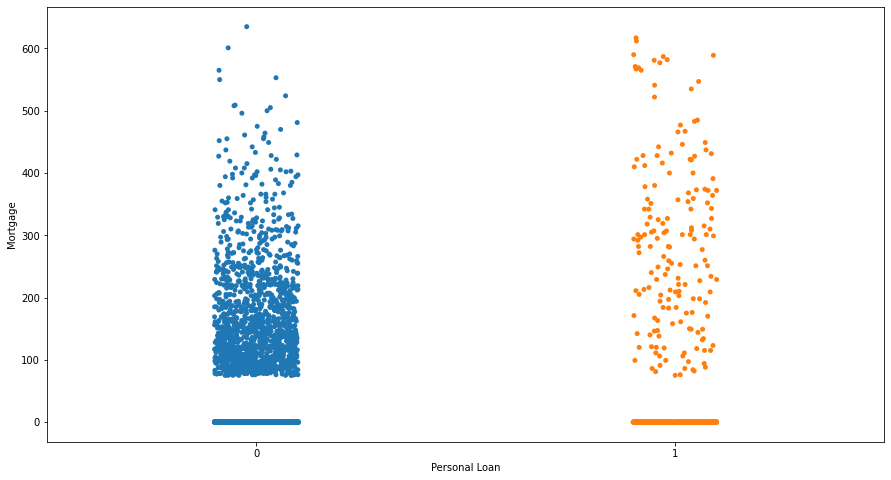

In [213]:
sns.stripplot(data=df, x='Personal Loan', y = 'Mortgage',jitter=True);

Mortgage also shows some skewness in the distribution but not a good predictor for Personal Loan.

### Multivariate Analysis with Target variable

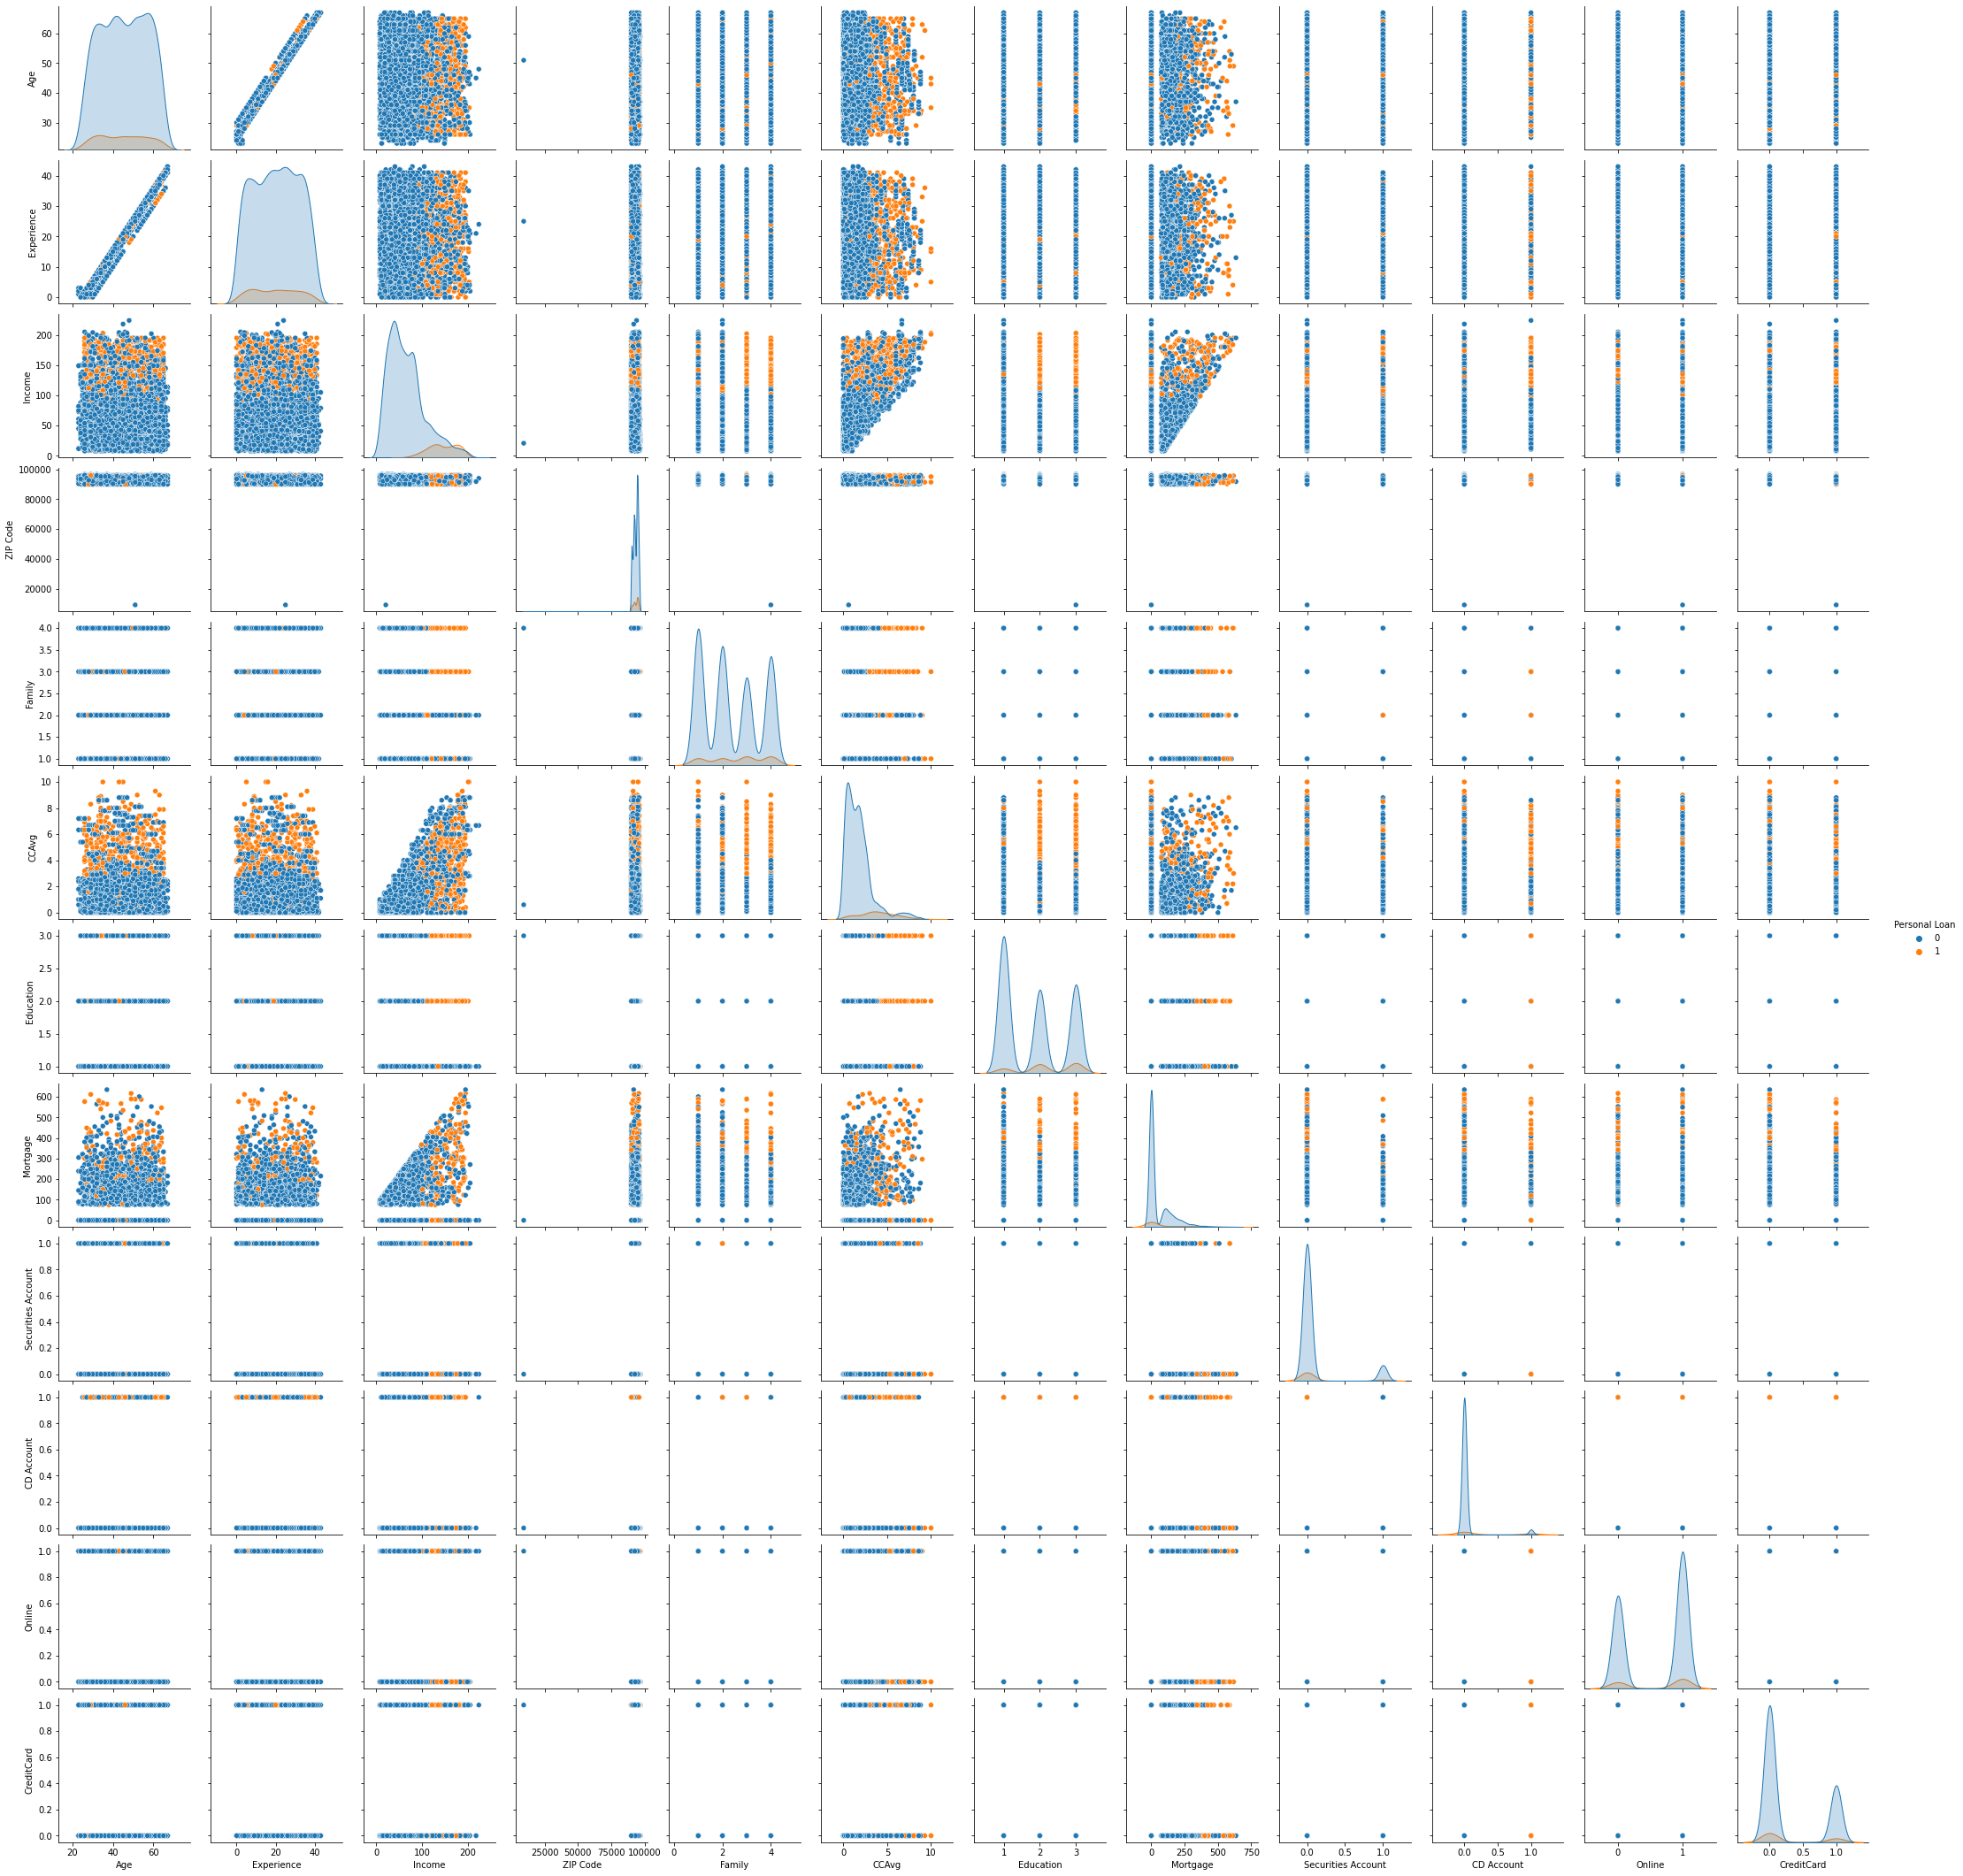

In [214]:
sns.pairplot(df.iloc[:,1:], hue='Personal Loan');

Age and Experience has strong linear co-relation between them.

CCAvg and Mortgage have also linear co-rrelation with Income.

The diagonal of the pairplot says Age and Experience are normally distributed for both the classes.Variable Income is highly skewed towards right.    

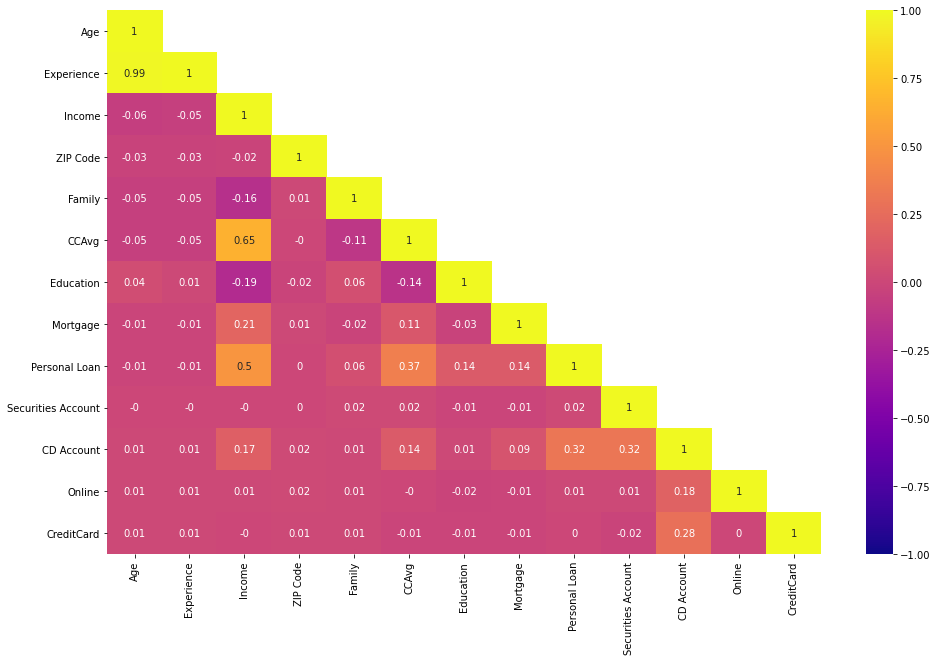

In [215]:
plt.figure(figsize=(16,10))
sns.heatmap(df.iloc[:,1:].corr().round(2), cmap='plasma', vmin=-1, 
            vmax=1, annot=True,
            mask=np.triu(df.iloc[:,1:].corr(),+1));

Age and Experience has strong co-relation between them.

Personal Loan has strong co-relation with Income

Correlation values near to 1 or -1 are highly positively correlated and highly negatively correlated respectively. Correlation values near to 0 are not correlated to each other.

CCAvg and Income are also +ve co-related

## Feature selection using sklearn library mutual_info_clasif 

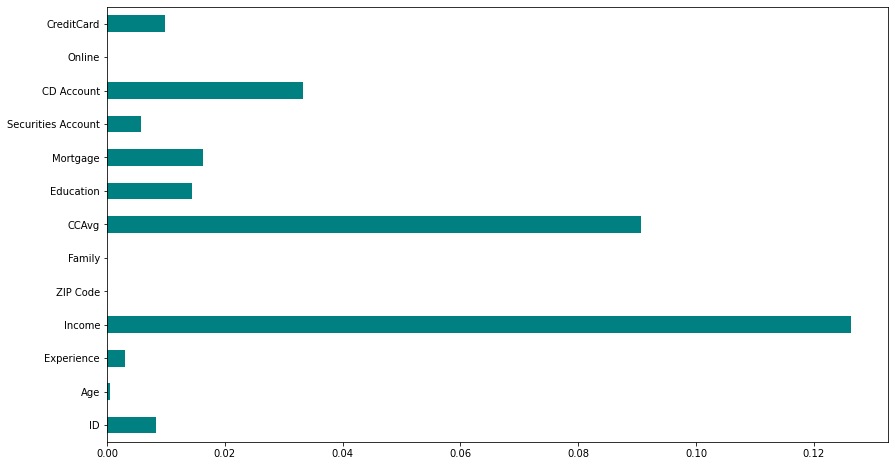

In [216]:
# Making a copy of the dataset and seperation the input and target variables
data = df.copy(deep=True)
X= data.drop('Personal Loan', axis=1)
Y = data.pop('Personal Loan')
# Using sklearn mutual_info_classif library for feature selection
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,Y)
feature_importance = pd.Series(importance, data.columns[0:len(data.columns)])
feature_importance.plot(kind='barh', color='teal', figsize=(14,8))
plt.show()

In [217]:
# Droping the atribites based on the above barh plot
df = df.drop({'Age', 'Experience','ZIP Code', 'Securities Account','Online','CreditCard'}, axis=1)
df.head()

ID  Income  Family  CCAvg  Education  Mortgage  Personal Loan  CD Account
0   1      49       4    1.6          1         0              0           0
1   2      34       3    1.5          1         0              0           0
2   3      11       1    1.0          1         0              0           0
3   4     100       1    2.7          2         0              0           0
4   5      45       4    1.0          2         0              0           0

# Q3.	Get the target column distribution. Your comments

In [218]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

#### The class of target varible is imbalanced which is 90% and 10% for class zero(0) and one(1). This might may impact the accuracy of traing and testing data because 90% of the entries are belongs to minority class (zero).

#### The Precision and recall for the class 1 may also not be good due very less observation for this class so to improve this I need to use SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.

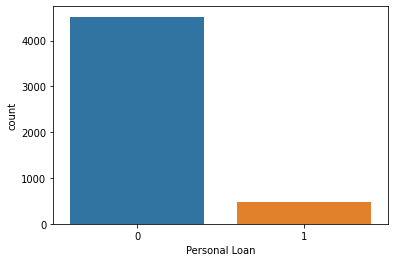

In [219]:
# Visualizing the target by using countplot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Personal Loan');

# Q4.	Split the data into training and test set in the ratio of 70:30 respectively 

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
# data = df.copy(deep=True)

In [222]:
x = df.drop(['ID', 'Personal Loan'], axis=1)
y = df.pop('Personal Loan')

In [223]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 1, stratify = y)

In [224]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3500, 6)
(3500,)
(1500, 6)
(1500,)


# Q5.	Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans.

### Logistic Model 

In [225]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg', max_iter=5000, penalty='none', verbose=True, n_jobs=2)

In [226]:
model.fit(x_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=2, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

In [227]:
### Predicting on Training and Test dataset
ytrain_predict = model.predict(x_train)
ytest_predict = model.predict(x_test)

In [228]:
# Getting the predicted probabilities
pd.DataFrame(model.predict_proba(x_test)).head()

0         1
0  0.607373  0.392627
1  0.989812  0.010188
2  0.998928  0.001072
3  0.999810  0.000190
4  0.970456  0.029544

In [229]:
# Accuracy - Training Data and Testing Data
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9502857142857143
0.94


## Confusion Matrix Comparison

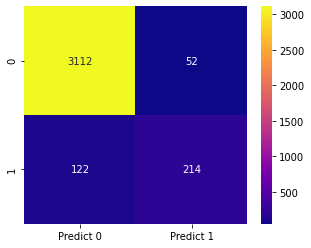

In [230]:
# Confusion matrix for Training Data 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
cm=metrics.confusion_matrix(y_train, ytrain_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');

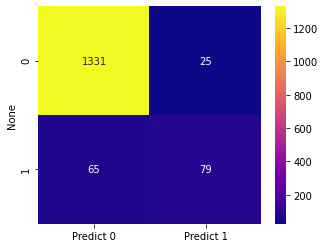

In [231]:
# Confusion matrix for Testing Data
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[[i for i in ['0','1']]], columns=[i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(5,4))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');

True Positives (TP): we correctly predicted that they go for Personal Loan 79

True Negatives (TN): we correctly predicted they don't go for Personal Loan 1331

False Positives (FP): we incorrectly predicted that they go for Personal Loan (a "Type I error") 25 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't go for Personal Loan (a "Type II error") 65 Falsely predict negative Type II error

In [232]:
# Classification Report on Training Data
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3164
           1       0.80      0.64      0.71       336

    accuracy                           0.95      3500
   macro avg       0.88      0.81      0.84      3500
weighted avg       0.95      0.95      0.95      3500



In [233]:
# Classification Report on Testining Data
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1356
           1       0.76      0.55      0.64       144

    accuracy                           0.94      1500
   macro avg       0.86      0.77      0.80      1500
weighted avg       0.93      0.94      0.94      1500



The precision for predicting the class 1 is 80% which is good for predicting the customer will go for personal loan

In [234]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
pred_train_prob = model.predict_proba(x_train)
pred_test_prob = model.predict_proba(x_test)

auc_train = roc_auc_score(y_train, pred_train_prob[:,1])
auc_test = roc_auc_score(y_test, pred_test_prob[:,1])

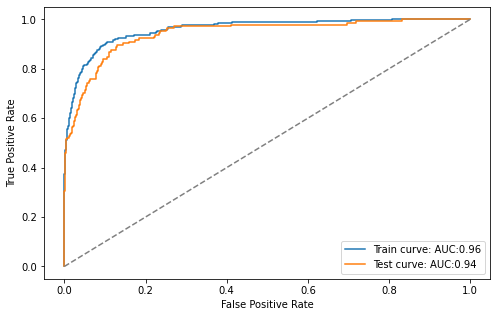

In [235]:
# ROC and AUC for Training and Testing Data
fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(model, x_train, y_train, ax=ax, label= 'Train curve: AUC:'+ str(round(auc_train,2)));
plot_roc_curve(model, x_test, y_test, ax=ax, label = 'Test curve: AUC:' + str(round(auc_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color = 'grey')

The ROC and AUC for training and testing data is also very good which is 96% and 94% respectively

# K-NN Model

In [236]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [237]:
xscaled = x.apply(zscore)
xscaled.head()

Income    Family     CCAvg  Education  Mortgage  CD Account
0 -0.538229  1.397414 -0.193385  -1.049078 -0.555524    -0.25354
1 -0.864109  0.525991 -0.250611  -1.049078 -0.555524    -0.25354
2 -1.363793 -1.216855 -0.536736  -1.049078 -0.555524    -0.25354
3  0.569765 -1.216855  0.436091   0.141703 -0.555524    -0.25354
4 -0.625130  1.397414 -0.536736   0.141703 -0.555524    -0.25354

Here I am scaling the independent variable because the KNN algorithum works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) 

In [238]:
x_train, x_test, y_train, y_test = train_test_split(xscaled, y, test_size=0.30, random_state=1, stratify =y)

In [239]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3500, 6)
(3500,)
(1500, 6)
(1500,)


In [240]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance' )

In [241]:
# Fitting the model for prediction
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [242]:
# Predicting on Training and Testing Data and calculating the score
train_predict = knn.predict(x_train)
test_predict = knn.predict(x_test)
print('Accuracy on Training Data',knn.score(x_train, y_train))
print('Accuracy on Testining Data',knn.score(x_test, y_test))

Accuracy on Training Data 1.0
Accuracy on Testining Data 0.97


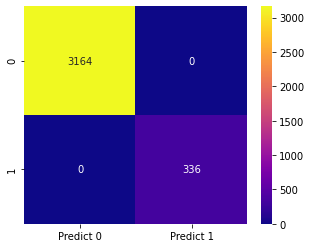

In [243]:
# Confusion Metrix for Training Data
cm = metrics.confusion_matrix(y_train,train_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[i for i in ['0','1']], columns=[i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(5,4))
sns.heatmap(df_cm, annot=True, cmap='plasma', fmt='g');

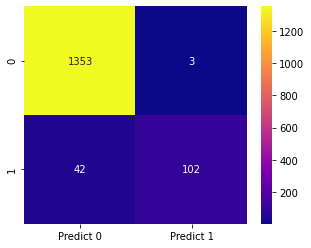

In [244]:
# Confusion Metrix for Testing Data
cm = metrics.confusion_matrix(y_test,test_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[i for i in ['0','1']], columns=[i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(5,4))
sns.heatmap(df_cm, annot=True, cmap='plasma', fmt='g');

True Positives (TP): we correctly predicted that they go for Personal Loan 102

True Negatives (TN): we correctly predicted they don't go for Personal Loan 1353 

False Positives (FP): we incorrectly predicted that they go for Personal Loan (a "Type I error") 42 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't go for Personal Loan (a "Type II error") 3 Falsely predict negative Type II error

In [245]:
# Classification report for Trainig Data
print(classification_report(y_train, train_predict ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3164
           1       1.00      1.00      1.00       336

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



In [246]:
# Classification report for Testing Data
print(classification_report(y_test, test_predict ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1356
           1       0.97      0.71      0.82       144

    accuracy                           0.97      1500
   macro avg       0.97      0.85      0.90      1500
weighted avg       0.97      0.97      0.97      1500



The KNN model has performed much better as compare to previous model in terms of precision as 96% for the custoner who will go for personal loan

In [247]:
train_predict_prob = knn.predict_proba(x_train)
test_predict_prob = knn.predict_proba(x_test)
AUC_train = roc_auc_score(y_train, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

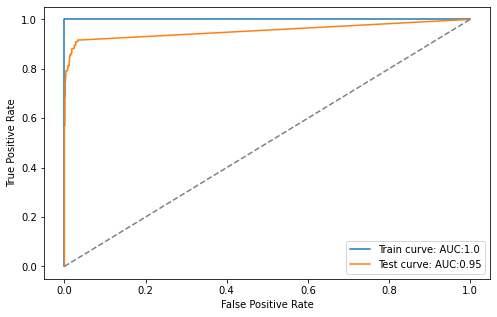

In [248]:
fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(knn, x_train, y_train, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(knn, x_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey')

The ROC and AUC for both the Training and Testing Data is giving very good score 100% and 90%.

# Naïve Bayes Model

In [249]:
from sklearn.naive_bayes import GaussianNB

In [250]:
NB_model = GaussianNB()

In [251]:
NB_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [252]:
# Predicting on Training and Testing Data and calculating the score
train_y_predict = NB_model.predict(x_train)
test_y_predict = NB_model.predict(x_test)
print('Accuracy on Training Data',NB_model.score(x_train, y_train))
print('Accuracy on Testining Data',NB_model.score(x_test, y_test))

Accuracy on Training Data 0.8885714285714286
Accuracy on Testining Data 0.8973333333333333


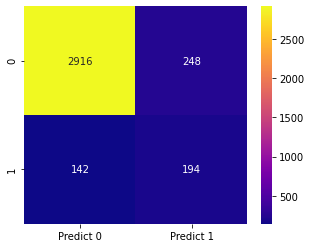

In [253]:
# Confusion Metrix for Training Data
cm = metrics.confusion_matrix(y_train,train_y_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[i for i in ['0','1']], columns=[i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(5,4))
sns.heatmap(df_cm, annot=True, cmap='plasma', fmt='g');

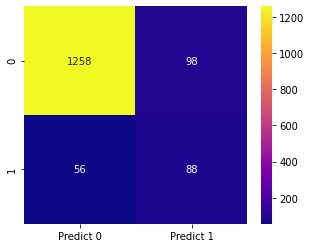

In [254]:
# Confusion Metrix for Testing Data
cm = metrics.confusion_matrix(y_test,test_y_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[i for i in ['0','1']], columns=[i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(5,4))
sns.heatmap(df_cm, annot=True, cmap='plasma', fmt='g');

True Positives (TP): we correctly predicted that they go for Personal Loan 88

True Negatives (TN): we correctly predicted they don't go for Personal Loan 1258

False Positives (FP): we incorrectly predicted that they go for Personal Loan (a "Type I error") 56 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't go for Personal Loan (a "Type II error") 98 Falsely predict negative Type II error

In [255]:
print(classification_report(y_train,train_y_predict ))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3164
           1       0.44      0.58      0.50       336

    accuracy                           0.89      3500
   macro avg       0.70      0.75      0.72      3500
weighted avg       0.90      0.89      0.90      3500



In [256]:
print(classification_report(y_test,test_y_predict ))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1356
           1       0.47      0.61      0.53       144

    accuracy                           0.90      1500
   macro avg       0.72      0.77      0.74      1500
weighted avg       0.91      0.90      0.90      1500



Naïve Bayes Model has not performed much better for predicting the class 1 in terms of precision i.e 48% only which is very low as compare to previous model

In [257]:
train_predict_prob = NB_model.predict_proba(x_train)
test_predict_prob = NB_model.predict_proba(x_test)
AUC_train = roc_auc_score(y_train, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

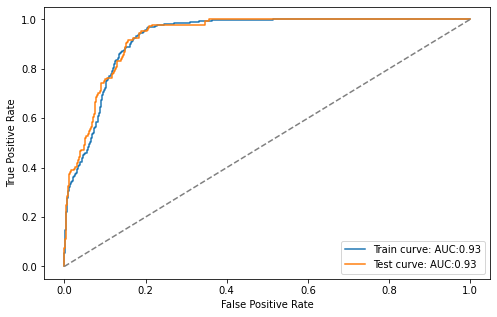

In [258]:
fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(NB_model, x_train, y_train, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(NB_model, x_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey')

# Q7.	Give your reasoning on which is the best model in this case and why it performs better? 

Final Conclusion:

After Comparing all the three model scaled KNN algorithm gives the best result for prediction of class 1 i.e 97% for Precision and 71% for recall.

The scalled KNN algorithum use metric='minkowski' for calculating the distance between the class varible.

In this model we can also improve the testing performance by balacing the class of the target variable using SMOTE.

In [260]:
# Converting ipynb to html
# ! jupyter nbconvert --to html Project_Supervised_Learning_Ajay_Kumar.ipynb